In [2]:
!pip install opencv-contrib-python --upgrade

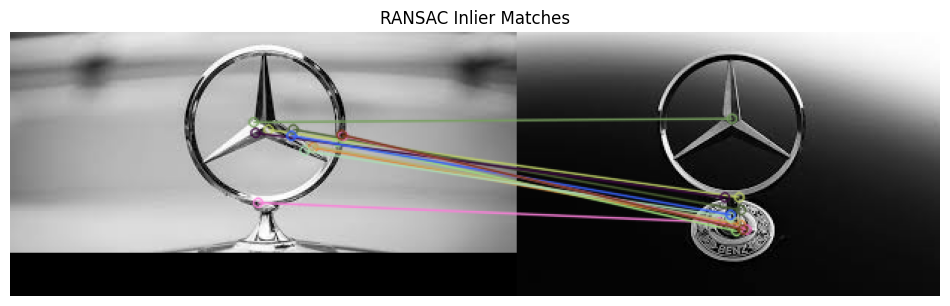

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('logo2.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('logo4.jpg', cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()

keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

points1 = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
points2 = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

H, mask = cv2.findHomography(points1, points2, cv2.RANSAC, 5.0)
matches_mask = mask.ravel().tolist()

img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches, None, matchesMask=matches_mask, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

img_matches_rgb = cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))
plt.title("RANSAC Inlier Matches")
plt.imshow(img_matches_rgb)
plt.axis('off')
plt.show()